In [20]:
from astropy.io import fits
import numpy as np
import os
import matplotlib.pyplot as plt
from astropy.stats import SigmaClip
from photutils.background import Background2D, SExtractorBackground
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from scipy import ndimage
from scipy.ndimage import gaussian_filter
import little_things_functions as ltf
import cv2
from scipy.optimize import curve_fit
from matplotlib.patches import Ellipse


# DDO 43

In [ ]:
'''
starless_file_u = fits.open(r"C:\Users\AYSAN\Desktop\project\Galaxy\Code\d43\starless\starless_DDO43_U_background_subtracted.fit")
starless_u = starless_file_u[0].data
starless_u[starless_u <= 0] = 1
starless_file_b = fits.open(r"C:\Users\AYSAN\Desktop\project\Galaxy\Code\d43\starless\starless_DDO43_b_background_subtracted.fit")
starless_b = starless_file_b[0].data
starless_b[starless_b <= 0] = 1
starless_file_v = fits.open(r"C:\Users\AYSAN\Desktop\project\Galaxy\Code\d43\starless\starless_DDO43_v_background_subtracted.fit")
starless_v = starless_file_v[0].data
starless_v[starless_v <= 0] = 1
DDO43 = [starless_u , starless_b , starless_v]
filters = ["U", "B", "V"]
# Constants and parameters
galaxy_name = "DDO43"
pixel_scale = 1.134
D = 5.5
E_B_V = 0.05
airmass_values=[1.16, 1.49, 1.11]
exposures = [1800, 1200, 600]
mU_values = [5.251, 0.459, -0.121, 0.]
mB_values = [3.445, 0.2522084, -0.022, 0.]
mV_values = [3.017, 0.137418, 0.045, 0.]
m_values = [mU_values,mB_values,mV_values]

box_size_x = 65
box_size_y = 65
box_center = [470,450]
galaxy_boxes = []
for i in range(0 , len(DDO43)):
        box = DDO43[i][box_center[1] - box_size_y : box_center[1] + box_size_y, box_center[0] - box_size_x : box_center[0] + box_size_x]
        plt.imshow(box, origin = "lower")
        plt.title("galaxy box %s %s"%(galaxy_name,filters[i]))
        plt.colorbar()
        plt.show() 
        galaxy_boxes.append(box)

plt.imshow(galaxy_boxes[2], origin = "lower")
plt.title("galaxy box %s %s"%(galaxy_name,filters[2]))
plt.colorbar()
plt.show() 

# Crop image to a specific region
box_size_x = 200
box_size_y = 200
box_center = (540, 380)
image_boxes = [DDO43[i][box_center[0] - box_size_y: box_center[0] + box_size_y, box_center[1] - box_size_x: box_center[1] + box_size_x] for i in range(len(DDO69))]

# Magnitude correction
b_box = ltf.mag_table_correction(image_boxes, airmass_values, m_values, pixel_scale, exposures)[1]
b_box = ltf.correct_reddening_B(b_box, E_B_V)
# Contour coordinates
contour_points = ltf.contour_lines_coordinates(b_box, 5, [25])
x_points, y_points = contour_points

# Center of mass for ellipse fitting
image_center_of_mass = ndimage.center_of_mass(b_box)
x, y = image_center_of_mass[1], image_center_of_mass[0]
initial_guess = [x, y, (max(x_points) - min(x_points)) / 2, (max(y_points) - min(y_points)) / 2, 0]

# Fit ellipse
popt_25, pcov_25 = curve_fit(ltf.ellipse, (x_points, y_points), np.zeros_like(x_points), p0=initial_guess)
xc, yc, a, b, theta = popt_25

# Plot the image, contour, and ellipse
fig, ax = plt.subplots()
ax.imshow(b_box, cmap='gray', origin='lower')
ax.plot(x_points, y_points)
ellipse = Ellipse(xy=(xc, yc), width=2*a, height=2*b, angle=np.degrees(theta), edgecolor='blue', facecolor='none', linewidth=2)
ax.add_patch(ellipse)
plt.title(f"Ellipse and Contour for {galaxy_name},B (not corrected for red)")
plt.show()

# Calculate the physical size
a_25_arcsec = a * pixel_scale
RB_25 = (D * a_25_arcsec) / 206265
print("RB 25 for DDO69 is:", RB_25 * 1000, "kpc")
print("Paper value is 0.30 kpc")
'''


# DDO 69

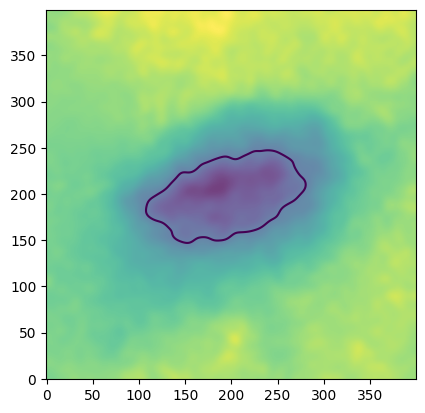

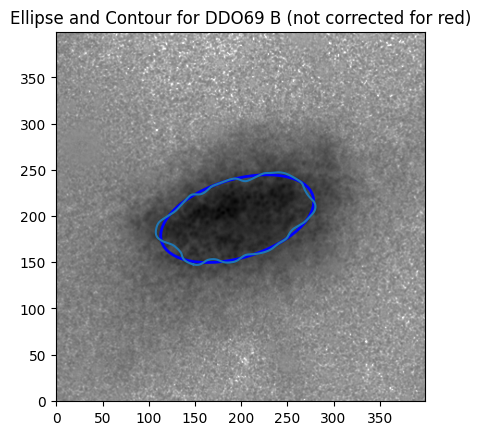

RB 25 for DDO69 is: 0.376118815432143 kpc
Paper value is 0.30 kpc


In [21]:
starless_file_u = fits.open(r"C:/Users\AYSAN\Desktop/project/Galaxy/Code\d69\starless1\starless_DDO69_U_background_subtracted.fit")
starless_u = starless_file_u[0].data
starless_u[starless_u <= 0] = 1
starless_file_b = fits.open(r"C:/Users\AYSAN\Desktop/project/Galaxy/Code\d69\starless1\starless_DDO69_B_background_subtracted.fit")
starless_b = starless_file_b[0].data
starless_b[starless_b <= 0] = 1
starless_file_v = fits.open(r"C:/Users\AYSAN\Desktop/project/Galaxy/Code\d69\starless1\starless_DDO69_V_background_subtracted.fit")
starless_v = starless_file_v[0].data
starless_v[starless_v <= 0] = 1

DDO69 = [starless_u , starless_b , starless_v]

# Constants and parameters
pixel_scale = 1.134
D = 0.8
E_B_V = 0.00
filters = ["U", "B", "V"]
exposures = [1800, 2400, 1200]
airmass_values = [1.22, 1.04, 1.1]
mU_values = [5.251, 0.459, -0.121, 0]
mV_values = [3.009, 0.2183592, 0.0415, 0.]
mB_values = [3.434, 0.3398903, -0.0157, 0.]
m_values = [mU_values, mB_values, mV_values]

# Crop image to a specific region
box_size_x = 200
box_size_y = 200
box_center = (540, 380)
image_boxes = [DDO69[i][box_center[0] - box_size_y: box_center[0] + box_size_y, box_center[1] - box_size_x: box_center[1] + box_size_x] for i in range(len(DDO69))]

# Magnitude correction
b_box = ltf.mag_table_correction(image_boxes, airmass_values, m_values, pixel_scale, exposures)[1]
b_box = ltf.correct_reddening_B(b_box, E_B_V)
# Contour coordinates
contour_points = ltf.contour_lines_coordinates(b_box, 5, [25])
x_points, y_points = contour_points

# Center of mass for ellipse fitting
image_center_of_mass = ndimage.center_of_mass(b_box)
x, y = image_center_of_mass[1], image_center_of_mass[0]
initial_guess = [x, y, (max(x_points) - min(x_points)) / 2, (max(y_points) - min(y_points)) / 2, 0]

# Fit ellipse
popt_25, pcov_25 = curve_fit(ltf.ellipse, (x_points, y_points), np.zeros_like(x_points), p0=initial_guess)
xc, yc, a, b, theta = popt_25

# Plot the image, contour, and ellipse
fig, ax = plt.subplots()
ax.imshow(b_box, cmap='gray', origin='lower')
ax.plot(x_points, y_points)
ellipse = Ellipse(xy=(xc, yc), width=2*a, height=2*b, angle=np.degrees(theta), edgecolor='blue', facecolor='none', linewidth=2)
ax.add_patch(ellipse)
plt.title("Ellipse and Contour for DDO69 B (not corrected for red)")
plt.show()

# Calculate the physical size
a_25_arcsec = a * pixel_scale
RB_25 = (D * a_25_arcsec) / 206265
print("RB 25 for DDO69 is:", RB_25 * 1000, "kpc")
print("Paper value is 0.30 kpc")


# DDO 101

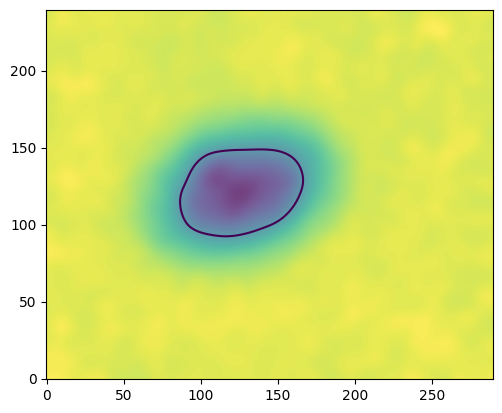

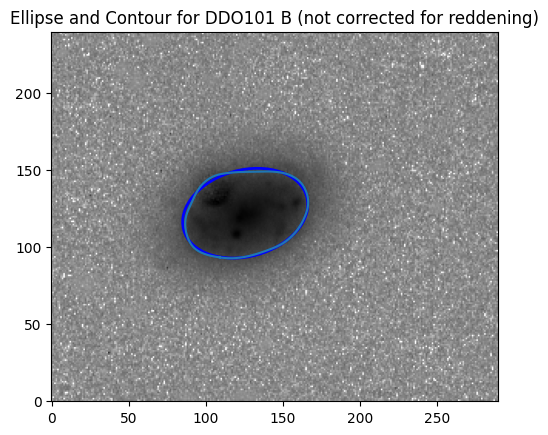

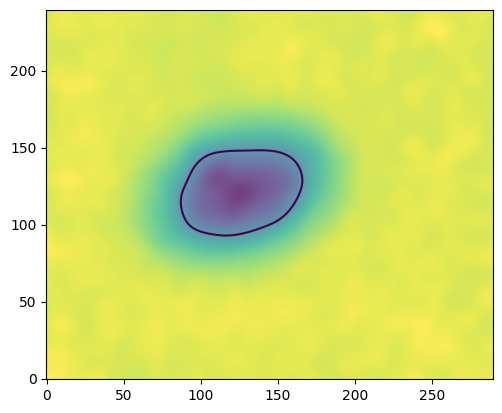

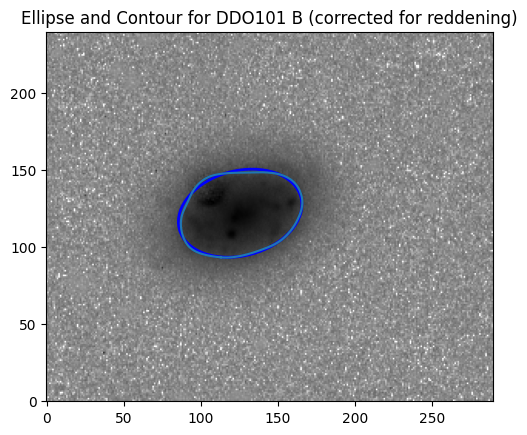

NOT corrected RB 25 for DDO101 is: 2.047411574355711 kpc
CORRECTED RB 25 for DDO101 is: 2.019418005596659 kpc
Paper value is 1.81 kpc


In [27]:
starless_file_u = fits.open(r"C:\Users\AYSAN\Desktop\project\Galaxy\Code\d101\starless\starless_DDO101_U_background_subtracted.fit")
starless_u = starless_file_u[0].data
starless_u[starless_u <= 0] = 1
starless_file_b = fits.open(r"C:\Users\AYSAN\Desktop\project\Galaxy\Code\d101\starless\starless_DDO101_b_background_subtracted.fit")
starless_b = starless_file_b[0].data
starless_b[starless_b <= 0] = 1
starless_file_v = fits.open(r"C:\Users\AYSAN\Desktop\project\Galaxy\Code\d101\starless\starless_DDO101_v_background_subtracted.fit")
starless_v = starless_file_v[0].data
starless_v[starless_v <= 0] = 1

DDO101 = [starless_u , starless_b , starless_v]
galaxy_name = "DDO101"
# Constants and parameters
pixel_scale = 1.134
D = 9.0
E_B_V = 0.01
airmass_values=[1.03, 1.015, 1.09]
exposures = [1800, 1800, 1200]
mU_values = [5.065, 0.514, -0.146, 0.]
mB_values = [3.445, 0.2373955, -0.022, 0.]
mV_values = [3.017, 0.1283061, 0.045, 0.]
m_values = [mU_values,mB_values,mV_values]

box_size_x = 145
box_size_y = 120
box_center = [450,500]

image_boxes = []
for i in range(0 , len(DDO101)):
        box = DDO101[i][box_center[1] - box_size_y : box_center[1] + box_size_y, box_center[0] - box_size_x : box_center[0] + box_size_x]
        image_boxes.append(box)

#--------------------------------------------------------------------------------------------------------------------------------------------------#
# Magnitude correction
b_box = ltf.mag_table_correction(image_boxes, airmass_values, m_values, pixel_scale, exposures)[1]
# Contour coordinates
contour_points = ltf.contour_lines_coordinates(b_box, 5, [25])
x_points, y_points = contour_points
# Center of mass for ellipse fitting
image_center_of_mass = ndimage.center_of_mass(b_box)
x, y = image_center_of_mass[1], image_center_of_mass[0]
initial_guess = [x, y, (max(x_points) - min(x_points)) / 2, (max(y_points) - min(y_points)) / 2, 0]
# Fit ellipse
popt_25, pcov_25 = curve_fit(ltf.ellipse, (x_points, y_points), np.zeros_like(x_points), p0=initial_guess)
xc, yc, a, b, theta = popt_25
# Plot the image, contour, and ellipse (not reddening corrected)
fig, ax = plt.subplots()
ax.imshow(b_box, cmap='gray', origin='lower')
ax.plot(x_points, y_points)
ellipse = Ellipse(xy=(xc, yc), width=2*a, height=2*b, angle=np.degrees(theta), edgecolor='blue', facecolor='none', linewidth=2)
ax.add_patch(ellipse)
plt.title(f"Ellipse and Contour for {galaxy_name} B (not corrected for reddening)")
plt.show()

#-------------------------------------------------------------------------------------------------------------------------------------------------#
b_box_corrected = ltf.correct_reddening_B(b_box, E_B_V)
contour_points_c = ltf.contour_lines_coordinates(b_box_corrected, 5, [25])
x_points_c, y_points_c = contour_points_c
# Center of mass for ellipse fitting
image_center_of_mass_c = ndimage.center_of_mass(b_box_corrected)
x, y = image_center_of_mass_c[1], image_center_of_mass_c[0]
initial_guess_c = [x, y, (max(x_points_c) - min(x_points_c)) / 2, (max(y_points_c) - min(y_points_c)) / 2, 0]
# Fit ellipse
popt_25_c, pcov_25_c = curve_fit(ltf.ellipse, (x_points_c, y_points_c), np.zeros_like(x_points_c), p0=initial_guess_c)
xc_c, yc_c, a_c, b_c, theta_c = popt_25_c
# Plot the image, contour, and ellipse (reddening corrected)
fig, ax = plt.subplots()
ax.imshow(b_box_corrected, cmap='gray', origin='lower')
ax.plot(x_points_c, y_points_c)
ellipse_c = Ellipse(xy=(xc, yc), width=2*a_c, height=2*b_c, angle=np.degrees(theta_c), edgecolor='blue', facecolor='none', linewidth=2)
ax.add_patch(ellipse_c)
plt.title(f"Ellipse and Contour for {galaxy_name} B (corrected for reddening)")
plt.show() 

#-------------------------------------------------------------------------------------------------------------------------------------------------#
# Calculate the physical size
a_25_arcsec = a * pixel_scale
RB_25 = (D * a_25_arcsec) / 206265
print(f"NOT corrected RB 25 for {galaxy_name} is:", RB_25 * 1000, "kpc")
a_25_arcsec_c = a_c * pixel_scale
RB_25_c = (D * a_25_arcsec_c) / 206265
print(f"CORRECTED RB 25 for {galaxy_name} is:", RB_25_c * 1000, "kpc")
print("Paper value is 1.81 kpc")